In [0]:
import pandas as pd
import numpy as np
from pylab import show,hist,subplot,figure
import matplotlib.pyplot as plt


In [7]:
dataset=pd.read_csv('microchip.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,result1,result2,accepted
0,-0.42108,-0.27266,1
1,-0.40380,0.70687,0
2,0.59274,-0.74050,0
3,-0.54781,0.70687,0
4,-0.40956,-0.41155,0
...,...,...,...
113,-0.48445,0.99927,0
114,-0.37500,0.50219,1
115,-0.75518,0.29020,0
116,0.85196,-0.36769,0


In [0]:
#covariance
def findMean(dataX,dataY,Y):
  count = 0
  Mean = np.zeros((1,dataX.shape[1]))
  for i in range(dataX.shape[0]):
    if(dataY[i] == Y):
      Mean[0,:]+=dataX[i]
      count+=1
  return Mean/(count)

def findCov(dataX,dataY):
  covariance = np.zeros((dataX.shape[1],dataX.shape[1]))
  Mean0 = findMean(dataX,dataY,0)
  Mean1 = findMean(dataX,dataY,1)
  deviationFromMean = np.ndarray(shape = dataX.shape)
  for i in range(dataX.shape[0]):
    if(dataY[i] == 1):
      deviationFromMean[i] = np.subtract(dataX[i],Mean1)
    else:
      deviationFromMean[i] = np.subtract(dataX[i],Mean0) 
  covariance =  (deviationFromMean.T@deviationFromMean)/dataX.shape[0]
  return covariance

In [0]:
def calc(sigma,x,y,GivenY,dataX,dataY):
  invsigma = np.linalg.inv(sigma)
  # print(x)
  # print(findMean(dataX,dataY,GivenY))
  MeanY=findMean(dataX,dataY,GivenY)
  r = np.subtract(x,MeanY)
  # print(r)
  pi=3.14
  dim=2
  p = 1/np.sqrt(np.linalg.det(sigma)) * np.exp(-0.5*np.dot(np.dot(r,invsigma), r.T));
  return p[0][0]

##testing

def test(trainX,trainY,testX,testY):
  sigma = findCov(trainX,trainY)
  P1=0
  P0=0

  for i in range(trainY.shape[0]):
    if trainY[i]==1:
      P1 += 1
    else:
      P0 += 1 
  P1/=trainY.shape[0]
  P0/=trainY.shape[0]
  # print(P1,P0)
  count =0

  for i in range(testX.shape[0]):
    p1= calc(sigma,testX[i],testY[i],1,trainX,trainY)
    p0 = calc(sigma,testX[i],testY[i],0,trainX,trainY)
    if((P1 * p1) >= (P0 * p0)):
        out=1
    else:
        out=0
    if(out==testY[i]):
      count+=1
  print("Accuracy on raw data= "+str((count/testX.shape[0])*100))

  

In [0]:
trainX = []
trainY = []
testX = []
testY = []

dataset
for i in range(dataset.shape[0]):
  if(i<0.70*dataset.shape[0]):
    trainX.append([dataset.iloc[i,0],dataset.iloc[i,1]])
    trainY.append(dataset.iloc[i,2])
  else:
    testX.append([dataset.iloc[i,0],dataset.iloc[i,1]])
    testY.append(dataset.iloc[i,2])
  
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

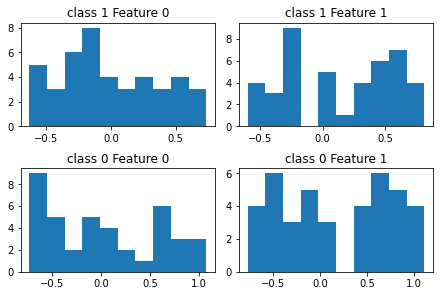

In [32]:
class_1_0 = []
class_0_0 = []
class_1_1 = []
class_0_1 = []

for i in range(trainX.shape[0]):
  if(trainY[i]==1):
    class_1_0.append(trainX[i][0])
    class_1_1.append(trainX[i][1])
  else:
    class_0_0.append(trainX[i][0])
    class_0_1.append(trainX[i][1])


fig,ax = plt.subplots(2,2,constrained_layout=True)
ax[0][0].hist(class_1_0) 
ax[0][0].set_title('class 1 Feature 0')
ax[0][1].hist(class_1_1) 
ax[0][1].set_title('class 1 Feature 1')
ax[1][0].hist(class_0_0) 
ax[1][0].set_title('class 0 Feature 0')
ax[1][1].hist(class_0_1) 
ax[1][1].set_title('class 0 Feature 1')
plt.show()

In [12]:
test(trainX,trainY,testX,testY)

Accuracy on raw data= 54.285714285714285
